# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pingouin as pg

# Utils

In [2]:
def get_zscore(s):
    return (s - s.mean()) / s.std()

def zscore_by_condition(data, metric, conditions):
    condition_df_list = []
    for group_name, group_df in data.groupby(by=conditions):
        group_df[f'z_{metric}'] = get_zscore(group_df[metric]).apply(abs)
        condition_df_list.append(group_df)

    df = pd.concat(condition_df_list)
    return df

# Params

In [3]:
data_dir = 'data'

# Conditions overview

## Training

In [4]:
all_training = []
for subject_dir in os.listdir(data_dir):
    df = pd.read_csv(f"{data_dir}\\{subject_dir}\\conditions_nback_training.csv")
    all_training.append(df)

all_training_df = pd.concat(all_training)
all_training_df = all_training_df.reset_index()

all_training_df

,index,sequence,is_target,condition,stimuli,block,is_block_beginning,is_block_ending,fname,subject
0,0,R,False,1,letter,1,True,False,robot_stimuli\\filler.mp4,0
1,1,F,False,1,letter,1,False,False,robot_stimuli\\filler.mp4,0
2,2,S,False,1,letter,1,False,False,robot_stimuli\\filler.mp4,0
3,3,R,False,1,letter,1,False,False,robot_stimuli\\filler.mp4,0
4,4,R,True,1,letter,1,False,False,robot_stimuli\\filler.mp4,0
...,...,...,...,...,...,...,...,...,...,...
859,31,R_Arm_X_Back,False,3,robot,2,False,False,robot_stimuli\R_Arm_X_Back.mp4,9
860,32,L_Head_Y_Back,False,3,robot,2,False,False,robot_stimuli\L_Head_Y_Back.mp4,9
861,33,L_Arm_Z_Back,True,3,robot,2,False,False,robot_stimuli\L_Arm_Z_Back.mp4,9
862,34,L_Head_Y_Back,False,3,robot,2,False,False,robot_stimuli\L_Head_Y_Back.mp4,9


18 trials for each of the 2 stimuli


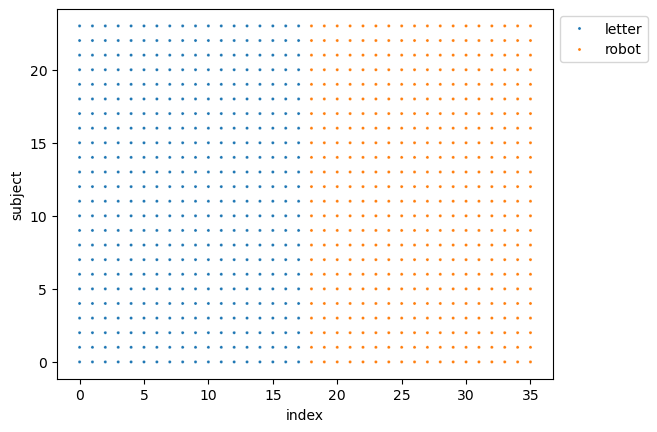

In [5]:
fig, ax = plt.subplots()
sns.scatterplot(data=all_training_df, x='index', y='subject', hue='stimuli', s=5, ax=ax)
ax.legend(bbox_to_anchor=(1,1))

print(f"{int(len(all_training_df['index'].unique())/len(all_training_df['stimuli'].unique()))} trials for each of the {len(all_training_df['stimuli'].unique())} stimuli")
plt.show()

6 blocks of 6 trials in total


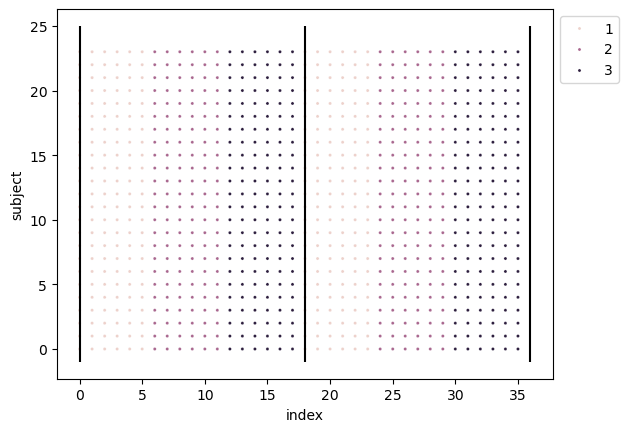

In [6]:
fig, ax = plt.subplots()

n_condition = len(all_training_df['condition'].unique())
n_trials = len(all_training_df['index'].unique())
n_blocks = len(all_training_df['block'].unique())
n_subjects = len(all_training_df['subject'].unique())

sns.scatterplot(data=all_training_df, x='index', y='subject', hue='condition', s=5, ax=ax)
ax.vlines(list(range(0, n_trials+1, int(n_trials/n_blocks))), -1, n_subjects+1, color='black')
ax.legend(bbox_to_anchor=(1,1))

print(f"{n_blocks*n_condition} blocks of {int(n_trials/(n_blocks*n_condition))} trials in total")
plt.show()

## Main

In [ ]:
all_conditions = []
for subject_dir in os.listdir(data_dir):
    
    df = pd.read_csv(f"{data_dir}\\{subject_dir}\\conditions_nback.csv")
    all_conditions.append(df)

all_conditions_df = pd.concat(all_conditions)
all_conditions_df = all_conditions_df.reset_index()

all_conditions_df

,index,sequence,is_target,condition,stimuli,block,is_block_beginning,is_block_ending,fname,subject
0,0,F,False,2,letter,1,True,False,robot_stimuli\\filler.mp4,0
1,1,L,False,2,letter,1,False,False,robot_stimuli\\filler.mp4,0
2,2,F,True,2,letter,1,False,False,robot_stimuli\\filler.mp4,0
3,3,J,False,2,letter,1,False,False,robot_stimuli\\filler.mp4,0
4,4,F,True,2,letter,1,False,False,robot_stimuli\\filler.mp4,0
...,...,...,...,...,...,...,...,...,...,...
21595,895,R_Arm_Z_For,False,1,robot,6,False,False,robot_stimuli\R_Arm_Z_For.mp4,9
21596,896,R_Base_X_For,False,1,robot,6,False,False,robot_stimuli\R_Base_X_For.mp4,9
21597,897,L_Head_X_For,False,1,robot,6,False,False,robot_stimuli\L_Head_X_For.mp4,9
21598,898,L_Torso_Z_For,False,1,robot,6,False,False,robot_stimuli\L_Torso_Z_For.mp4,9


450 trials for each of the 2 stimuli


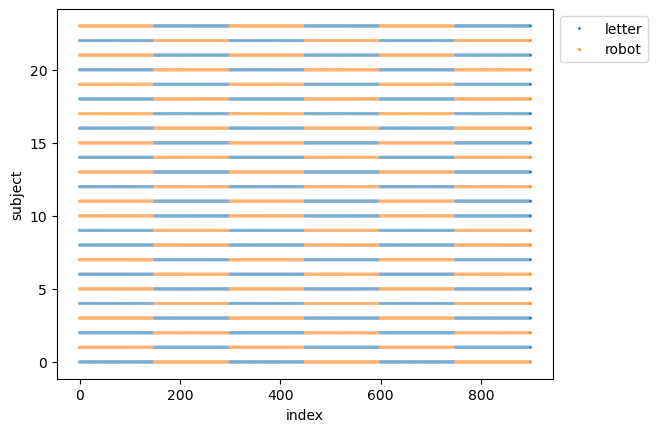

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=all_conditions_df, x='index', y='subject', hue='stimuli', s=5, ax=ax)
ax.legend(bbox_to_anchor=(1,1))

print(f"{int(len(all_conditions_df['index'].unique())/len(all_conditions_df['stimuli'].unique()))} trials for each of the {len(all_conditions_df['stimuli'].unique())} stimuli")
plt.show()

18 blocks of 50 trials in total


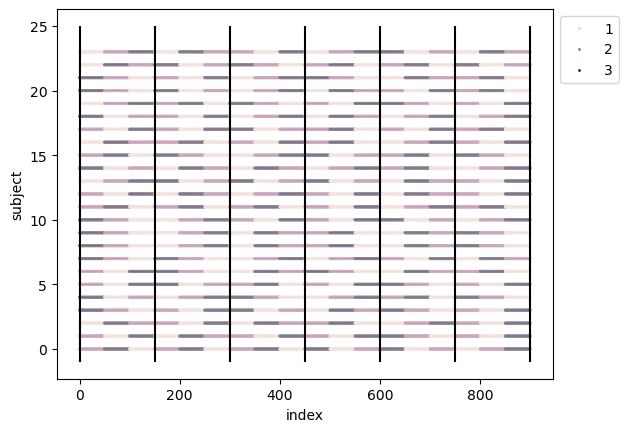

In [ ]:
fig, ax = plt.subplots()

n_condition = len(all_conditions_df['condition'].unique())
n_trials = len(all_conditions_df['index'].unique())
n_blocks = len(all_conditions_df['block'].unique())
n_subjects = len(all_conditions_df['subject'].unique())

sns.scatterplot(data=all_conditions_df, x='index', y='subject', hue='condition', s=5, ax=ax)
ax.vlines(list(range(0, n_trials+1, int(n_trials/n_blocks))), -1, n_subjects+1, color='black')
ax.legend(bbox_to_anchor=(1,1))

print(f"{n_blocks*n_condition} blocks of {int(n_trials/(n_blocks*n_condition))} trials in total")
plt.show()

# Subjects

## Loading

In [113]:
all_results = []
all_match = []
for subject_dir in os.listdir(data_dir):
    result_fnames = [elem for elem in os.listdir(f'data\\{subject_dir}') if elem.split('_')[0]==subject_dir.split('_')[-1] and elem.split('.')[-1]=='csv']

    if len(result_fnames)>0:
        result_fname = result_fnames[-1]
        df = pd.read_csv(f"{data_dir}\\{subject_dir}\\{result_fname}")
        df = df[df['sequence'].apply(lambda x : isinstance(x,str))]
        df['is_training'] = df['training.thisTrialN'].notna()

        # display(df)

        all_results.append(df)
        all_match.append(subject_dir)

print(f"Get results from subject : {sorted([int(elem.split('_')[-1])for elem in all_match])}")

if len(all_match)>0:
    all_result_df = pd.concat(all_results).reset_index(drop=True)
    loaded_subjects = all_result_df['subject'].unique()

Get results from subject : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


## Main results

In [114]:
main_result_df = all_result_df[all_result_df['is_training']==False]

column_of_interest = ['sequence', 'is_target', 'condition', 'stimuli', 'block', 'subject', 'is_training', 'trials.thisTrialN', 'key.keys', 'key.rt', 'RSME_ticks.response']
main_result_df = main_result_df[column_of_interest].rename(columns={'trials.thisTrialN':'trial_n', 'key.keys':'keys', 'key.rt':'rt', 'RSME_ticks.response':'rsme'})
main_result_df[['condition','block','subject','trial_n']] = main_result_df[['condition','block','subject','trial_n']].astype(int)


def get_confusion(x):
    answer, is_target = x['keys'], x['is_target']

    if answer=='None':
        return 'miss'
    elif (answer,is_target) == ('c', True): #c pressed + is_target
        return 'tp'
    elif (answer,is_target) == ('n', False): #n pressed + not is_target
        return 'tn'
    elif (answer,is_target) == ('n', True): #n pressed + is_target
        return 'fn'
    elif (answer,is_target) == ('c', False): #c pressed + not is_target
        return 'fp'

main_result_df['confusion'] = main_result_df.apply(get_confusion,axis=1)

## Results conditions

450 trials for each of the 2 stimuli


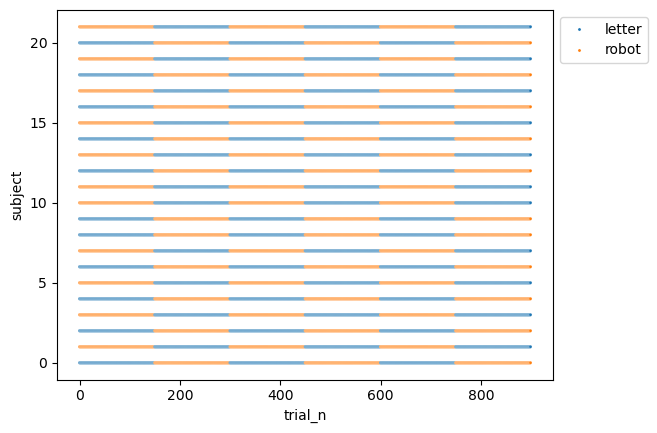

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=main_result_df, x='trial_n', y='subject', hue='stimuli', s=5, ax=ax)
ax.legend(bbox_to_anchor=(1,1))

print(f"{int(len(main_result_df['trial_n'].unique())/len(main_result_df['stimuli'].unique()))} trials for each of the {len(main_result_df['stimuli'].unique())} stimuli")
plt.show()

18 blocks of 50 trials in total


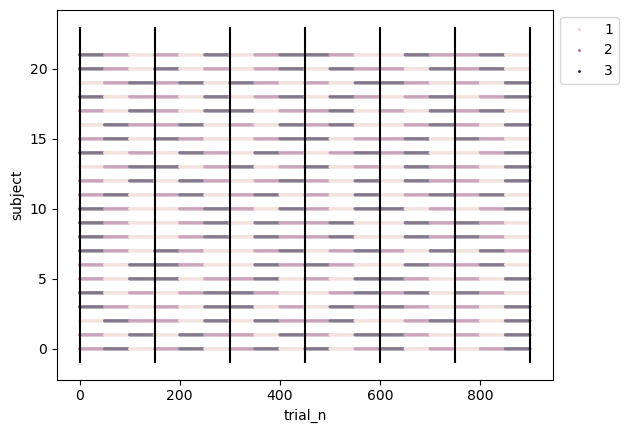

In [ ]:
fig, ax = plt.subplots()

n_condition = len(main_result_df['condition'].unique())
n_trials = len(main_result_df['trial_n'].unique())
n_blocks = len(main_result_df['block'].unique())
n_subjects = len(main_result_df['subject'].unique())

sns.scatterplot(data=main_result_df, x='trial_n', y='subject', hue='condition', s=5, ax=ax)
ax.vlines(list(range(0, n_trials+1, int(n_trials/n_blocks))), -1, n_subjects+1, color='black')
ax.legend(bbox_to_anchor=(1,1))

print(f"{n_blocks*n_condition} blocks of {int(n_trials/(n_blocks*n_condition))} trials in total")
plt.show()

## Subject Level

### Accuracy

In [ ]:
iv = ['subject','stimuli','condition']
dv = 'confusion'

melted_accuracy_df = main_result_df.groupby(by=iv, as_index=False)[dv].value_counts()

accuracy_df = melted_accuracy_df.pivot(columns='confusion', index=iv).fillna(0).astype(int)
accuracy_df.columns = [elem[1] for elem in accuracy_df.columns]

accuracy_df = accuracy_df.reset_index()
accuracy_df

,subject,stimuli,condition,fn,fp,miss,tn,tp
0,0,letter,1,0,0,1,120,29
1,0,letter,2,0,0,2,118,30
2,0,letter,3,3,2,4,114,27
3,0,robot,1,0,2,4,117,27
4,0,robot,2,2,4,5,112,27
...,...,...,...,...,...,...,...,...
127,21,letter,2,0,0,8,113,29
128,21,letter,3,6,5,47,74,18
129,21,robot,1,0,5,14,101,30
130,21,robot,2,8,11,44,67,20


In [ ]:
order = ['tn', 'tp', 'fp', 'fn', 'miss']
melted_accuracy_df['confusion'] = pd.Categorical(melted_accuracy_df['confusion'], categories=order)

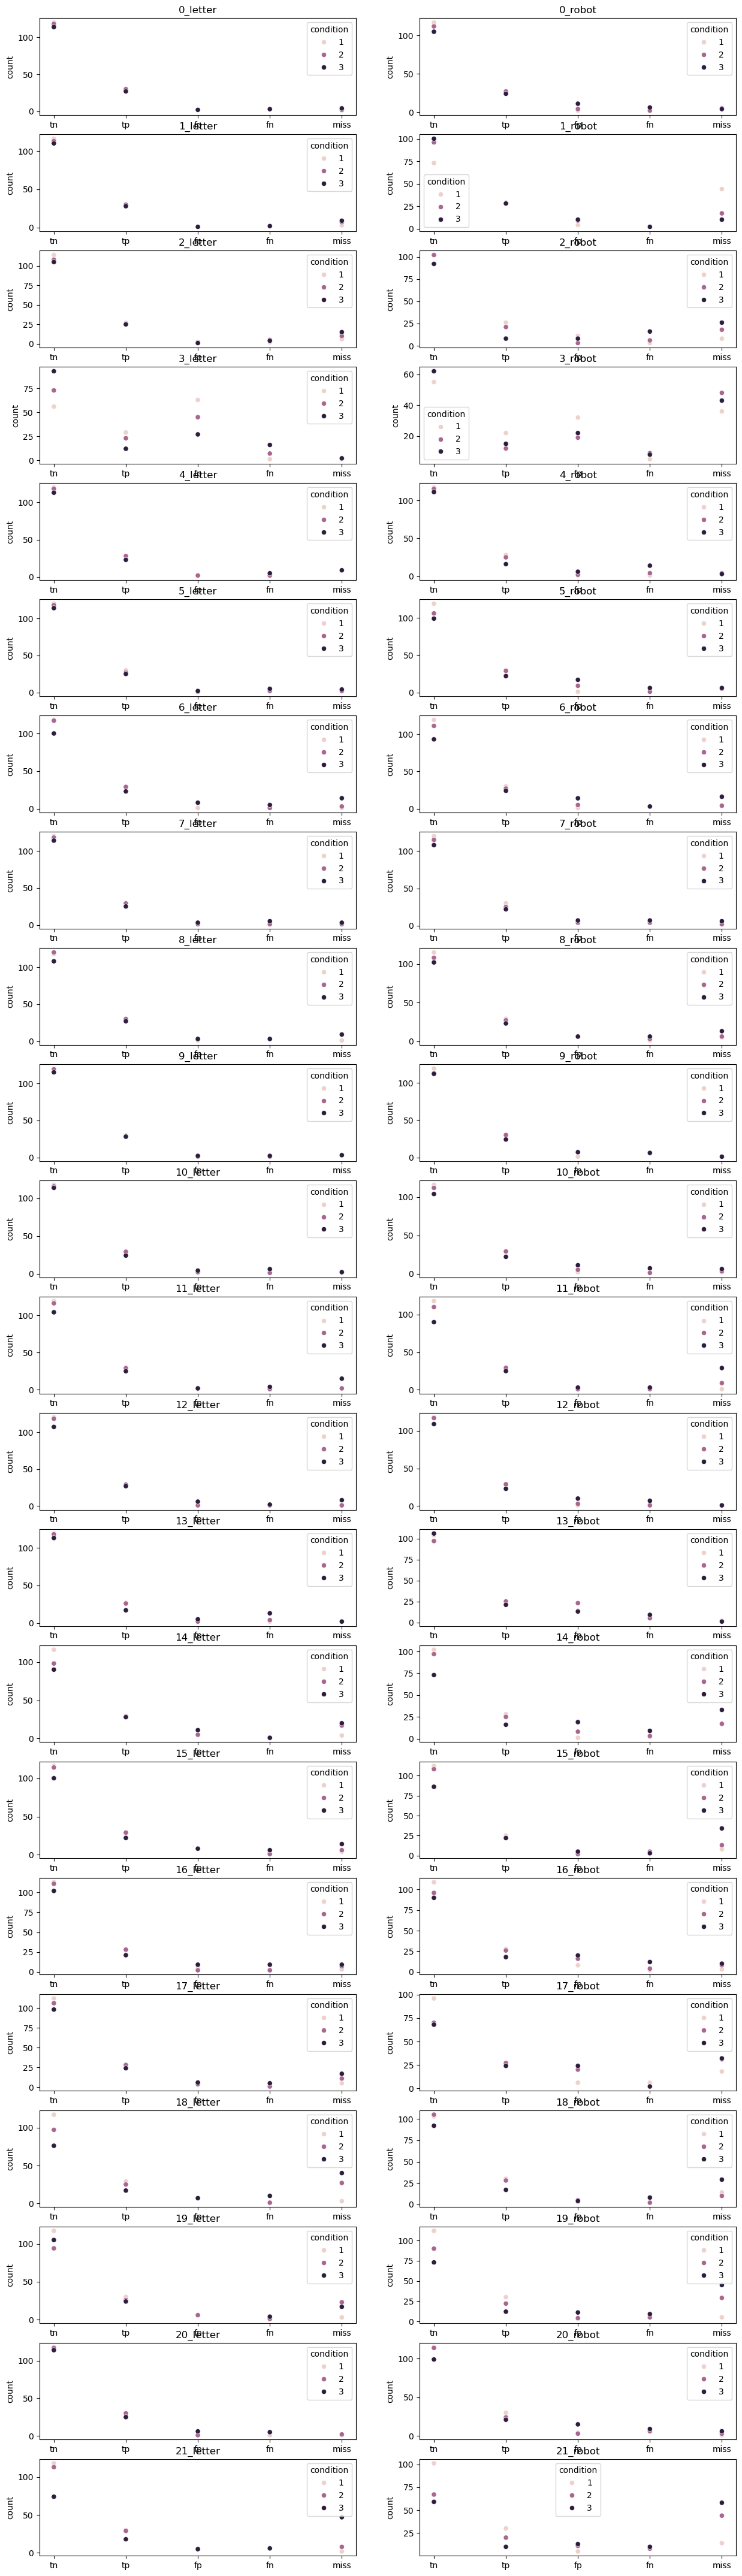

In [ ]:
fig, axs = plt.subplots(len(main_result_df['subject'].unique()),2, figsize = (15,55))

for subject in main_result_df['subject'].unique():
    subject_df = melted_accuracy_df[melted_accuracy_df['subject']==subject]
    for i, stimuli in enumerate(['letter', 'robot']):
        ax = axs[subject, i]
        plot_df = subject_df[subject_df['stimuli']==stimuli]
        sns.scatterplot(data=plot_df, x='confusion', y='count', hue='condition', ax=ax)
        ax.set_title(f'{subject}_{stimuli}')
        ax.set_xlabel('')

plt.show()

### Response Time

In [ ]:
iv = ['subject','stimuli','condition']
dv = 'rt'

rt_df = main_result_df.groupby(by=iv, as_index=False)[dv].mean()

rt_df

,subject,stimuli,condition,rt
0,0,letter,1,0.586520
1,0,letter,2,0.906121
2,0,letter,3,1.124155
3,0,robot,1,1.983420
4,0,robot,2,2.396408
...,...,...,...,...
103,17,letter,2,0.942858
104,17,letter,3,0.961597
105,17,robot,1,2.374592
106,17,robot,2,2.614764


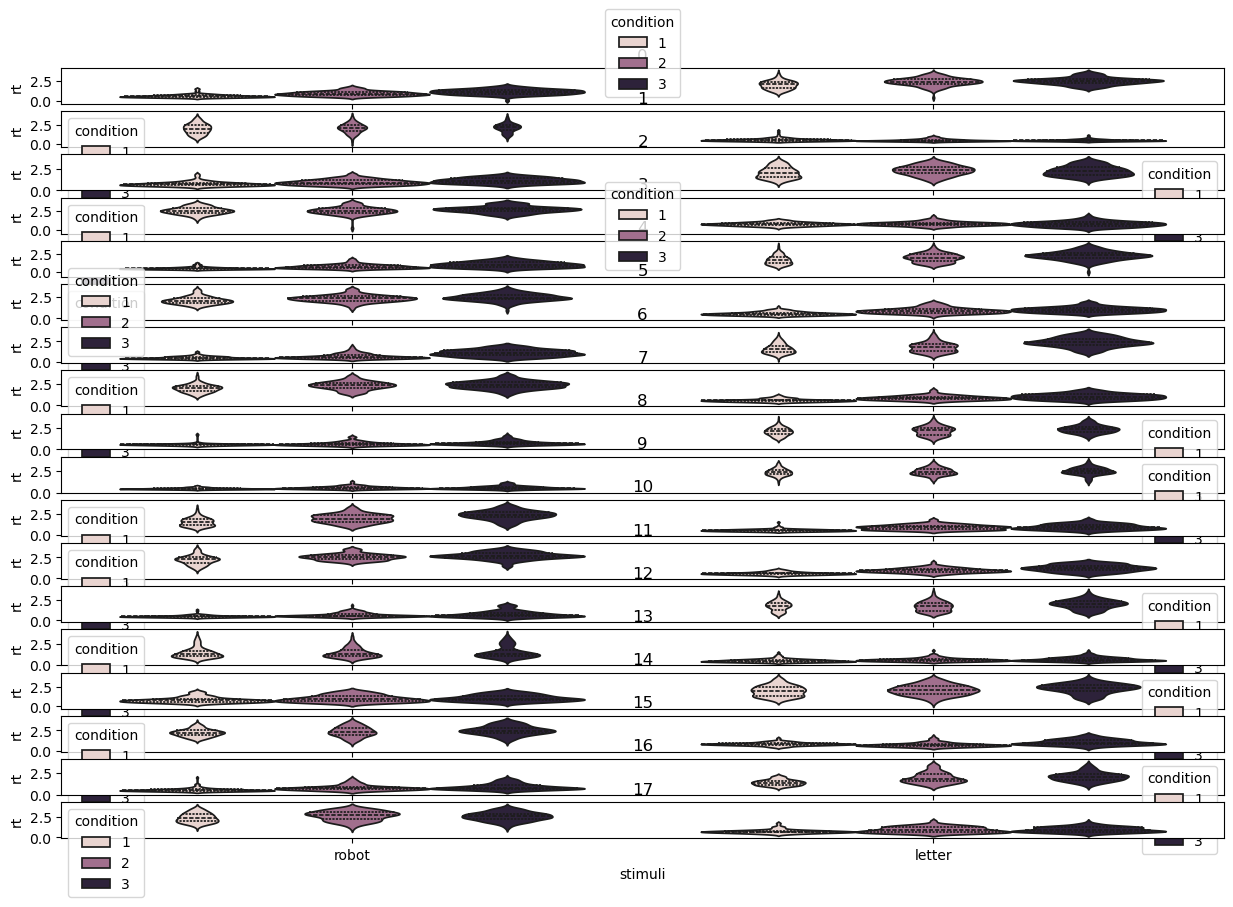

In [ ]:
fig, axs = plt.subplots(len(main_result_df['subject'].unique()), figsize = (15,10))

for subject in main_result_df['subject'].unique():
    subject_df = main_result_df[main_result_df['subject']==subject]
    ax = axs[subject]
    sns.violinplot(data=subject_df, x='stimuli', y='rt', hue='condition',inner='quart', ax=ax)
    ax.set_title(f'{subject}')

plt.show()

### RSME

In [ ]:
iv = ['subject','stimuli','condition']
dv = 'rsme'

rsme_df = main_result_df[main_result_df[dv]!='None'].copy()
rsme_df['rsme'] = rsme_df['rsme'].astype(float)

rsme_df[iv+[dv]]

,subject,stimuli,condition,rsme
85,0,letter,2,23.672840
135,0,letter,3,49.290123
185,0,letter,1,11.944444
235,0,robot,2,91.111111
285,0,robot,3,118.425926
...,...,...,...,...
16683,9,letter,3,77.685185
16733,9,letter,2,58.240741
16783,9,robot,3,64.259259
16833,9,robot,2,38.796296


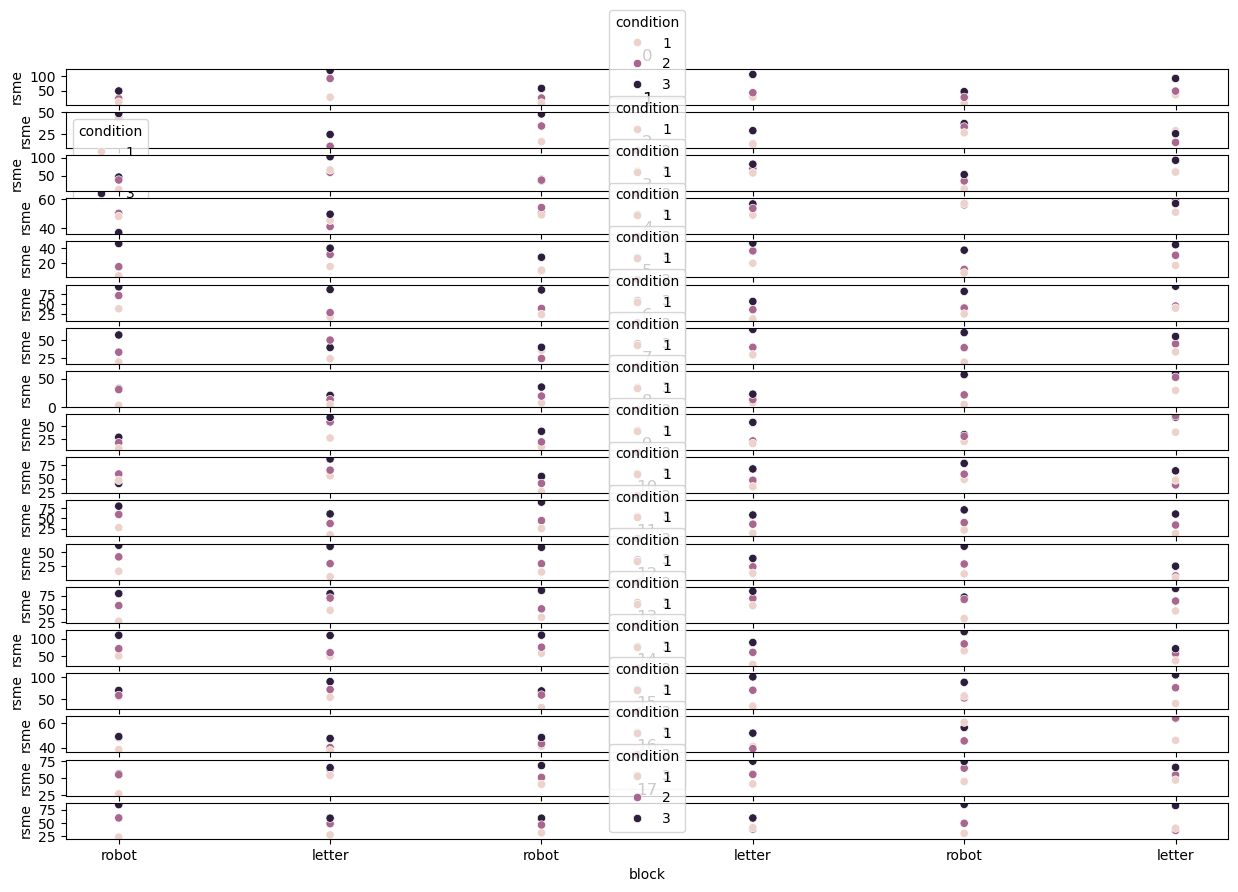

In [ ]:
fig, axs = plt.subplots(len(main_result_df['subject'].unique()), figsize = (15,10))

for subject in main_result_df['subject'].unique():
    subject_df = rsme_df[rsme_df['subject']==subject]
    ax = axs[subject]
    sns.scatterplot(data=subject_df, x='block', y='rsme', hue='condition', ax=ax)
    ax.set_title(f'{subject}')

    block_order = subject_df[['block','stimuli']].apply(tuple, axis=1).unique()
    ax.set_xticks([elem[0] for elem in block_order], [elem[1] for elem in block_order])

plt.show()

# Group Level

## Loading

In [4]:
all_results = []
all_match = []
for subject_dir in os.listdir(data_dir):
    result_fnames = [elem for elem in os.listdir(f'data\\{subject_dir}') if elem.split('_')[0]==subject_dir.split('_')[-1] and elem.split('.')[-1]=='csv']

    if len(result_fnames)>0:
        result_fname = result_fnames[-1]
        df = pd.read_csv(f"{data_dir}\\{subject_dir}\\{result_fname}")
        df = df[df['sequence'].apply(lambda x : isinstance(x,str))]
        df['is_training'] = df['training.thisTrialN'].notna()

        # display(df)

        all_results.append(df)
        all_match.append(subject_dir)

print(f"Get results from subject : {sorted([int(elem.split('_')[-1])for elem in all_match])}")

if len(all_match)>0:
    all_result_df = pd.concat(all_results).reset_index(drop=True)
    loaded_subjects = all_result_df['subject'].unique()

Get results from subject : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [5]:
all_result_df.columns

Index(['sequence', 'is_target', 'condition', 'stimuli', 'block',
       'is_block_beginning', 'is_block_ending', 'fname', 'subject',
       'retraining.thisRepN', 'retraining.thisTrialN', 'retraining.thisN',
       'retraining.thisIndex', 'training.thisRepN', 'training.thisTrialN',
       'training.thisN', 'training.thisIndex', 'trials.thisRepN',
       'trials.thisTrialN', 'trials.thisN', 'trials.thisIndex',
       'langage_text.started', 'langage_key.started', 'langage_key.keys',
       'langage_key.rt', 'intro_text.started', 'intro_key.started',
       'intro_key.keys', 'intro_key.rt', 'training_robot_intro_text.started',
       'training_robot_intro_key.started', 'training_robot_intro_key.keys',
       'training_robot_intro_key.rt', 'cross.started', 'cross.stopped',
       'training_letter.started', 'training_robot_key.started',
       'training_robot_question.started', 'training_robot_keys.started',
       'training_letter.stopped', 'training_robot_key.keys',
       'RSME_labels.s

In [6]:
main_result_df = all_result_df[all_result_df['is_training']==False]

column_of_interest = ['sequence', 'is_target', 'condition', 'stimuli', 'block', 'subject', 'is_training', 'trials.thisTrialN', 'key.keys', 'key.rt', 'RSME_ticks.response']
main_result_df = main_result_df[column_of_interest].rename(columns={'trials.thisTrialN':'trial_n', 'key.keys':'keys', 'key.rt':'rt', 'RSME_ticks.response':'rsme'})
main_result_df[['condition','block','subject','trial_n']] = main_result_df[['condition','block','subject','trial_n']].astype(int)


def get_confusion(x):
    answer, is_target = x['keys'], x['is_target']

    if not isinstance(answer, str):
        return 'miss'
    elif (answer,is_target) == ('c', True): #c pressed + is_target
        return 'tp'
    elif (answer,is_target) == ('n', False): #n pressed + not is_target
        return 'tn'
    elif (answer,is_target) == ('n', True): #n pressed + is_target
        return 'fn'
    elif (answer,is_target) == ('c', False): #c pressed + not is_target
        return 'fp'

main_result_df['confusion'] = main_result_df.apply(get_confusion,axis=1)

## Time

In [7]:
iv1 = 'subject'
iv2 = 'stimuli'
block_start = 'block_intro_key.started'
block_start_var = 'block_intro_key.rt'
block_end = 'RSME_ticks.stopped'
block_end_var = 'RSME_ticks.response'

time_df_list = []
time_result_df = all_result_df[all_result_df['is_training']==False]
for group, subdf in time_result_df.groupby(iv1):
    time_subdf = subdf[[iv2, block_start_var, block_start]].dropna()[[iv2, block_start]].reset_index(drop=True).reset_index().rename(columns={block_start:'start'})
    time_subdf['end'] = subdf[[block_end_var, block_end]].dropna()[block_end].reset_index(drop=True)
    time_subdf['duration'] = time_subdf['end'] - time_subdf['start']
    time_subdf['subject'] = int(group)
    time_df_list.append(time_subdf)

time_df = pd.concat(time_df_list)

display(time_df.groupby(by='stimuli')['duration'].describe())
display(time_df.groupby(by='stimuli')['duration'].mean().apply(lambda x : f"{int(x/60)}min {round(x%60)}s"))

,count,mean,std,min,25%,50%,75%,max
stimuli,,,,,,,,
letter,216.0,187.797980,42.112065,162.089802,169.788893,175.638445,187.973415,531.835962
robot,216.0,261.368111,29.849622,239.279945,245.762738,252.136266,264.248368,476.447321


stimuli
letter     3min 8s
robot     4min 21s
Name: duration, dtype: object

## Outliers

In [9]:
# Using previous run, subject 3 accuracy is more than 3 std lower than other subjects (on at least on condition)
outliers = [3]
clean_result = main_result_df[main_result_df['subject'].apply(lambda x : x not in outliers)].copy()

## Accuracy

In [10]:
iv = ['subject','stimuli','condition']
dv = 'confusion'

order = ['tn', 'tp', 'fp', 'fn', 'miss']

melted_accuracy_df = clean_result.groupby(by=iv, as_index=False)[dv].value_counts()
melted_accuracy_df['confusion'] = pd.Categorical(melted_accuracy_df['confusion'], categories=order)

accuracy_df = melted_accuracy_df.pivot(columns='confusion', index=iv).fillna(0).astype(int)
accuracy_df.columns = [elem[1] for elem in accuracy_df.columns]

accuracy_df = accuracy_df.reset_index()
accuracy_df.head()

,subject,stimuli,condition,tn,tp,fp,fn,miss
0,0,letter,1,120,29,0,0,1
1,0,letter,2,118,30,0,0,2
2,0,letter,3,114,27,2,3,4
3,0,robot,1,117,27,2,0,4
4,0,robot,2,112,27,4,2,5


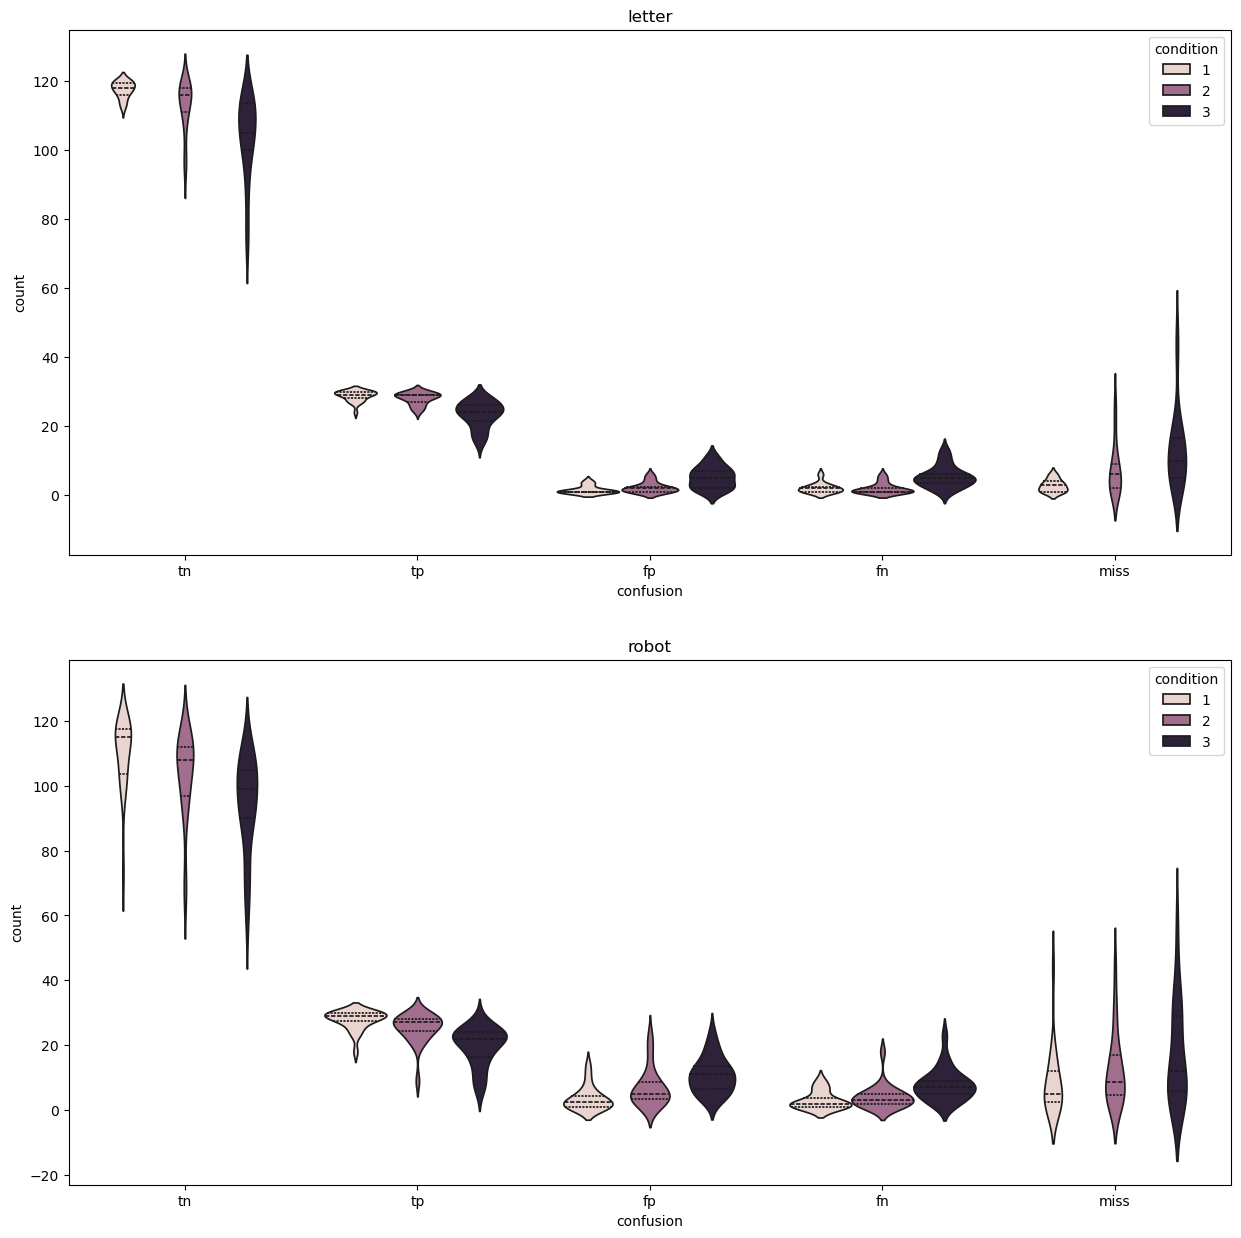

In [11]:
fig, axs = plt.subplots(2, figsize = (15,15))
for i, stimuli in enumerate(['letter', 'robot']):
        ax = axs[i]
        plot_df = melted_accuracy_df[melted_accuracy_df['stimuli']==stimuli]
        sns.violinplot(data=plot_df, x='confusion', y='count', hue='condition',inner='quart', ax=ax)
        ax.set_title(f'{stimuli}')

In [12]:
# Using combinatory metrics
accuracy_df['recall'] = accuracy_df['tp']/(accuracy_df['tp']+accuracy_df['fn'])
accuracy_df['precision'] = accuracy_df['tp']/(accuracy_df['tp']+accuracy_df['fp'])
accuracy_df['f1'] = 2*(accuracy_df['recall']*accuracy_df['precision'])/(accuracy_df['recall']+accuracy_df['precision'])

accuracy_df['total'] = accuracy_df[['tn', 'tp', 'fp', 'fn', 'miss']].sum(axis=1)
accuracy_df['correct'] = (accuracy_df['tp']+accuracy_df['tn'])/accuracy_df['total']

accuracy_df.head()

,subject,stimuli,condition,tn,tp,fp,fn,miss,recall,precision,f1,total,correct
0,0,letter,1,120,29,0,0,1,1.000000,1.000000,1.000000,150,0.993333
1,0,letter,2,118,30,0,0,2,1.000000,1.000000,1.000000,150,0.986667
2,0,letter,3,114,27,2,3,4,0.900000,0.931034,0.915254,150,0.940000
3,0,robot,1,117,27,2,0,4,1.000000,0.931034,0.964286,150,0.960000
4,0,robot,2,112,27,4,2,5,0.931034,0.870968,0.900000,150,0.926667


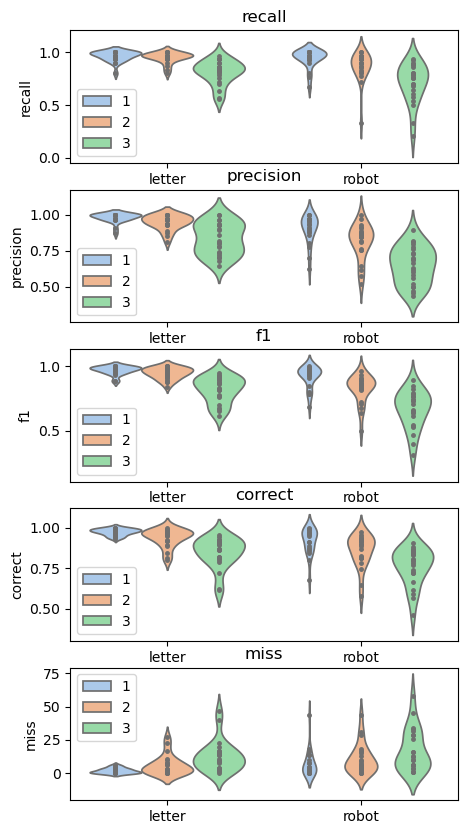

In [13]:
metrics = ['recall', 'precision', 'f1', 'correct', 'miss']
fig, axs = plt.subplots(len(metrics), figsize = (5,10))

subject = None
data = accuracy_df

for i, metric in enumerate(metrics):
        ax = axs[i]

        sns.violinplot(data=data, x='stimuli', y=metric, hue='condition',inner='point', ax=ax, palette='pastel')
        handles, labels = ax.get_legend_handles_labels()

        if subject != None:
                subject_df = data[data['subject']==subject]
                sns.violinplot(data=subject_df, x='stimuli', y=metric, hue='condition', inner='point',ax=ax)
        
        ax.legend(handles, labels)
        ax.set_title(f'{metric}')
        ax.set_xlabel('')
plt.show()

c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


stimuli  condition
letter   1            0.971024
         2            0.947752
         3            0.818881
robot    1            0.921518
         2            0.827110
         3            0.666115
Name: f1, dtype: float64

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,stimuli,0.399716,1,22,0.399716,48.278976,5.636152e-07,5.636152e-07,0.686962,1.000000
1,condition,1.011865,2,44,0.505932,148.370011,2.771084e-20,2.639540e-14,0.870869,0.668613
2,stimuli * condition,0.064227,2,44,0.032113,6.709643,2.862119e-03,8.286050e-03,0.233707,0.697588


c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


stimuli  condition
letter   1            0.975072
         2            0.938261
         3            0.846667
robot    1            0.920580
         2            0.858261
         3            0.760290
Name: correct, dtype: float64

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,stimuli,0.187003,1,22,0.187003,33.224359,8.473005e-06,8.473005e-06,0.601625,1.00000
1,condition,0.494910,2,44,0.247455,56.121409,7.804724e-13,7.238664e-09,0.718387,0.62831
2,stimuli * condition,0.006547,2,44,0.003273,1.470351,2.409174e-01,2.416305e-01,0.062647,0.94575


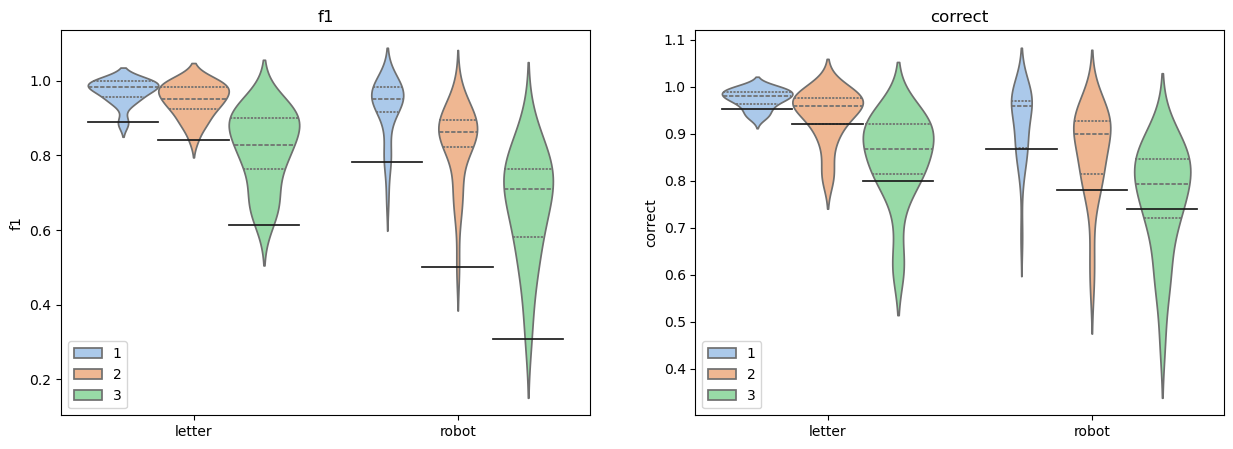

In [14]:
iv = ['stimuli', 'condition']
metrics = ['f1', 'correct']
fig, axs = plt.subplots(1, 2, figsize = (15,5))

subject = 23
data = accuracy_df
stats=True

for i in range(2):
        ax = axs[i]
        metric = metrics[i]

        if stats:
                stat_df = pg.rm_anova(dv=metric, within=iv, subject='subject', data=data, detailed=True, effsize='np2')
                display(data.groupby(by=iv)[metric].mean())
                display(stat_df)

        sns.violinplot(data=data, x=iv[0], y=metric, hue=iv[1],inner='quarter', ax=ax, palette='pastel')
        handles, labels = ax.get_legend_handles_labels()

        if subject != None:
                subject_df = data[data['subject']==subject]
                sns.violinplot(data=subject_df, x=iv[0], y=metric, hue=iv[1], inner='point',ax=ax)

        ax.legend(handles, labels)
        ax.set_title(f'{metric}')
        ax.set_xlabel('')

plt.show()

In [15]:
metric = 'f1'
data = accuracy_df

z_df = zscore_by_condition(data, metric, ['stimuli', 'condition'])
z_df[z_df[f'z_{metric}']>3]

,subject,stimuli,condition,tn,tp,fp,fn,miss,recall,precision,f1,total,correct,z_f1
136,23,robot,2,108,9,0,18,15,0.333333,1.0,0.5,150,0.78,3.024439


## Response Time

In [16]:
# Add "miss" as 3s response time ?

In [17]:
clean_result['z_rt'] = get_zscore(clean_result['rt'])
clean_result['abs_z_rt'] = clean_result['z_rt'].apply(abs)

In [18]:
clean_result[clean_result['abs_z_rt']>3]['subject'].value_counts()

Series([], Name: count, dtype: int64)

In [19]:
iv = ['subject','stimuli','condition']
dv = 'rt'

# rt_df = clean_result[clean_result['abs_z_rt']<3].groupby(by=iv, as_index=False)[dv].mean()
rt_df = clean_result.groupby(by=iv, as_index=False)[dv].mean()

rt_df.head()

,subject,stimuli,condition,rt
0,0,letter,1,0.586520
1,0,letter,2,0.906121
2,0,letter,3,1.124155
3,0,robot,1,1.983420
4,0,robot,2,2.396408


c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


stimuli  condition
letter   1            0.627207
         2            0.857178
         3            0.978341
robot    1            2.022058
         2            2.214279
         3            2.353711
Name: rt, dtype: float64

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,stimuli,65.300014,1,22,65.300014,660.772066,6.636254e-18,6.636254e-18,0.967778,1.000000
1,condition,2.730688,2,44,1.365344,68.119961,3.366953e-14,6.078670e-12,0.755881,0.811957
2,stimuli * condition,0.008197,2,44,0.004098,0.445980,6.430582e-01,6.210080e-01,0.019869,0.891778


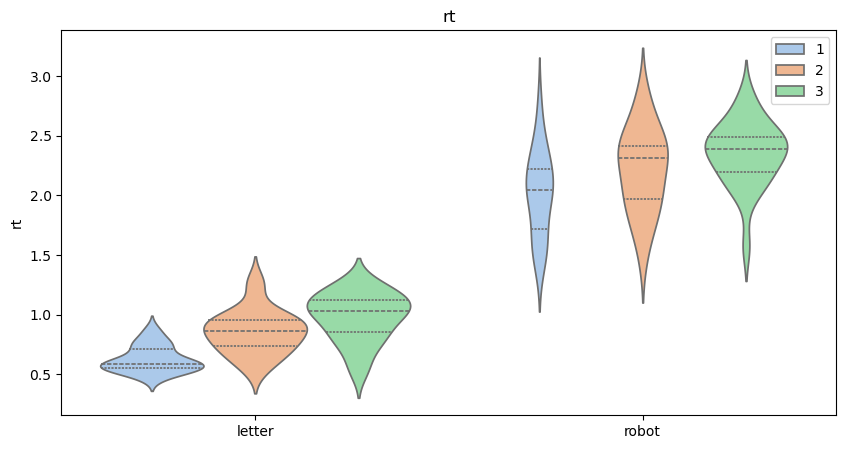

In [20]:
iv = ['stimuli', 'condition']
metrics = ['rt']
fig, axs = plt.subplots(len(metrics), figsize = (10,5))

subject = None
data = rt_df
stat=True

for i, metric in enumerate(metrics):
        # ax = axs[i]
        ax=axs
        if stats:
                stat_df = pg.rm_anova(dv=metric, within=iv, subject='subject', data=data, detailed=True, effsize='np2')
                display(data.groupby(by=iv)[metric].mean())
                display(stat_df)

        sns.violinplot(data=data, x=iv[0], y=metric, hue=iv[1],inner='quarter', ax=ax, palette='pastel')
        handles, labels = ax.get_legend_handles_labels()

        if subject != None:
                subject_df = data[data['subject']==subject]
                sns.violinplot(data=subject_df, x=iv[0], y=metric, hue=iv[1], inner='point',ax=ax)

        ax.legend(handles, labels)
        ax.set_title(f'{metric}')
        ax.set_xlabel('')

plt.show()

In [21]:
metric = 'rt'
data = rt_df

z_df = zscore_by_condition(data, metric, ['stimuli', 'condition'])
z_df[z_df[f'z_{metric}']>3]

,subject,stimuli,condition,rt,z_rt


## Subjectif

In [22]:
iv = ['subject','stimuli','condition']
dv = 'rsme'

clean_result_subdf = clean_result[clean_result['rsme']!='None'].copy()
clean_result_subdf['rsme'] = clean_result_subdf['rsme'].astype(float)

rsme_df = clean_result_subdf.groupby(by=iv, as_index=False)[dv].mean()

rsme_df.head()

,subject,stimuli,condition,rsme
0,0,letter,1,9.886831
1,0,letter,2,25.679012
2,0,letter,3,51.450617
3,0,robot,1,31.234568
4,0,robot,2,61.121399


c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
c:\Users\ma.rihet\.conda\envs\epiic\Lib\site-packages\pingouin\distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


stimuli  condition
letter   1            24.974503
         2            40.540794
         3            62.415459
robot    1            33.019324
         2            51.734657
         3            75.878064
Name: rsme, dtype: float64

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,stimuli,4099.267969,1,22,4099.267969,17.972916,3.361872e-04,3.361872e-04,0.449627,1.000000
1,condition,37340.246291,2,44,18670.123146,87.954018,4.233063e-16,9.218575e-11,0.799916,0.615918
2,stimuli * condition,170.261544,2,44,85.130772,2.281287,1.141094e-01,1.194937e-01,0.093952,0.912060


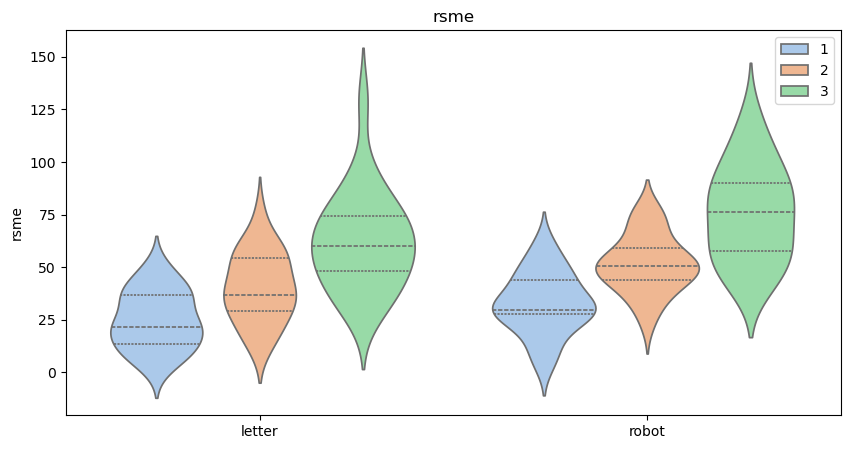

In [20]:
iv = ['stimuli', 'condition']
metrics = ['rsme']
fig, axs = plt.subplots(len(metrics), figsize = (10,5))

subject = None
data = rsme_df
stat = True

for i, metric in enumerate(metrics):
        # ax = axs[i]
        ax=axs
        if stats:
                stat_df = pg.rm_anova(dv=metric, within=iv, subject='subject', data=data, detailed=True, effsize='np2')
                display(data.groupby(by=iv)[metric].mean())
                display(stat_df)

        sns.violinplot(data=data, x=iv[0], y=metric, hue=iv[1],inner='quarter', ax=ax, palette='pastel')
        handles, labels = ax.get_legend_handles_labels()

        if subject != None:
                subject_df = data[data['subject']==subject]
                sns.violinplot(data=subject_df, x=iv[0], y=metric, hue=iv[1], inner='point',ax=ax)

        ax.legend(handles, labels)
        ax.set_title(f'{metric}')
        ax.set_xlabel('')

plt.show()

In [21]:
metric = 'rsme'
data = rsme_df

z_df = zscore_by_condition(data, metric, ['stimuli', 'condition'])
z_df[z_df[f'z_{metric}']>3]

,subject,stimuli,condition,rsme,z_rsme


## All results

In [22]:
iv = ['subject', 'stimuli', 'condition']
metrics = ['correct', 'f1', 'rt', 'rsme']
result_df = accuracy_df.merge(rt_df, left_on=iv, right_on=iv).merge(rsme_df, left_on=iv, right_on=iv)
result_df = result_df[iv + metrics]

result_df

,subject,stimuli,condition,correct,f1,rt,rsme
0,0,letter,1,0.993333,1.000000,0.586520,9.886831
1,0,letter,2,0.986667,1.000000,0.906121,25.679012
2,0,letter,3,0.940000,0.915254,1.124155,51.450617
3,0,robot,1,0.960000,0.964286,1.983420,31.234568
4,0,robot,2,0.926667,0.900000,2.396408,61.121399
...,...,...,...,...,...,...,...
133,23,letter,2,0.920000,0.842105,0.831448,47.849794
134,23,letter,3,0.800000,0.612245,0.859869,51.141975
135,23,robot,1,0.866667,0.782609,2.212445,28.302469
136,23,robot,2,0.780000,0.500000,2.384655,51.862140


In [23]:
result_df.to_csv("nback_results.csv", index=False)